# Digit Recognizer

#### importing the libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.layers import Conv2D,Dropout,Dense,GlobalAveragePooling2D,MaxPool2D,Flatten
from sklearn.model_selection import train_test_split

#### loading the dataset

In [45]:
dataset = pd.read_csv('train.csv')

In [46]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


#### checking the missing values

In [48]:
dataset.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

- There is no missing values in our dataset

#### checking the shape of dataset

In [49]:
dataset.shape

(42000, 785)

- Each data point consists of 785 values. A fully connected net just treats all these values the same, but a CNN treats it as a 28x28 square. 

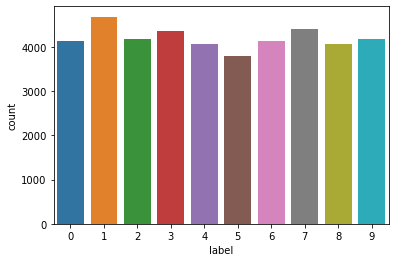

In [50]:
import seaborn as sns
sns.countplot(x = 'label', data = dataset)

- There are total 10 classes that's represent 0 to 9 digits.

##   Data Preparing

#### dependent and independent dataset

In [51]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [52]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [54]:
X=X.reshape(-1,28,28,1)

 - We  reshaped all data this way. Keras wants an extra dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.

In [55]:
X = X/255

- It would be possible to train the net on the original data, with pixel values 0 to 255. If we use the standard initialization methods for weights, however, data between 0 and 1 should make the net converge faster.

#### OneHot Enocding to depedent variable

- The labels were given as integers between 0 and 9. We need to convert these to one-hot encoding, i.e. a 10x1 array with one 1 and nine 0:s, with the position of the 1 showing us the value. See the example, with the position of the 1 showing the correct value for the digit in the graph above.

In [56]:
from keras.utils.np_utils import to_categorical
y=to_categorical(y)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

#### splitting the data into train and test set

In [57]:

X_train,X_val, y_train, y_val = train_test_split(X,y, test_size  =  0.20, random_state = 0)

## Modeling

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,GlobalAveragePooling2D,MaxPool2D,Flatten

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)        

#### compile the model

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Data Augumentation

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1/.255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


train_generator=train_datagen.flow(
    X_train,y_train,
    batch_size= 128
    )


In [63]:
valid_datagen=ImageDataGenerator(
    rescale=1/.255)
valid_generator=valid_datagen.flow(
    X_val,y_val,
    batch_size=128)

In [64]:
import tensorflow as tf
callbacks = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                          min_delta=0,
                                          patience=5,
                                          verbose=1,
                                          mode='auto',
                                          restore_best_weights=True)

- To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased

#### train the model

In [65]:
model_history = model.fit(train_generator,
                  epochs=100,
                  steps_per_epoch= X_train.shape[0]//128,  # 262 steps
                  verbose=1,
                  validation_data=valid_generator,
                  validation_steps= X_val.shape[0]//128,  # 65 steps for validation_steps
                  callbacks=[callbacks])


Epoch 1/100
262/262 [==============================] - 151s 575ms/step - loss: 0.9781 - accuracy: 0.6537 - val_loss: 0.3290 - val_accuracy: 0.9268
Epoch 2/100
262/262 [==============================] - 154s 588ms/step - loss: 0.2453 - accuracy: 0.9250 - val_loss: 0.1184 - val_accuracy: 0.9588
Epoch 3/100
262/262 [==============================] - 156s 595ms/step - loss: 0.1594 - accuracy: 0.9530 - val_loss: 0.0347 - val_accuracy: 0.9755
Epoch 4/100
262/262 [==============================] - 160s 610ms/step - loss: 0.1257 - accuracy: 0.9624 - val_loss: 0.1094 - val_accuracy: 0.9793
Epoch 5/100
262/262 [==============================] - 162s 618ms/step - loss: 0.1044 - accuracy: 0.9676 - val_loss: 0.1212 - val_accuracy: 0.9842
Epoch 6/100
262/262 [==============================] - 155s 593ms/step - loss: 0.0881 - accuracy: 0.9730 - val_loss: 0.0237 - val_accuracy: 0.9860
Epoch 7/100
262/262 [==============================] - 156s 596ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0

## Visualizing the performace of CNN Model

#### visualizing the accuracy of model

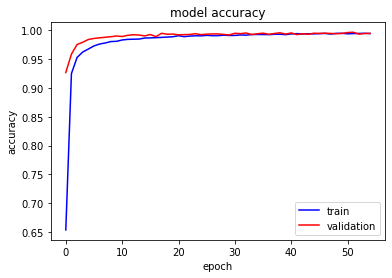

In [66]:
plt.plot(model_history.history['accuracy'], color = 'b')
plt.plot(model_history.history['val_accuracy'], color = 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc= 'best')
plt.show()

#### visulizing the loss of the model

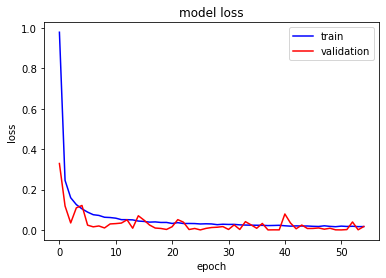

In [67]:
plt.plot(model_history.history['loss'], color = 'b')
plt.plot(model_history.history['val_loss'], color = 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

## Applying Model on testing dataset

In [94]:
test_df = pd.read_csv('test.csv')

In [95]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
test_df.shape

(28000, 784)

- Total record 28000

In [97]:
test = test_df.values.reshape(-1,28,28,1)

In [98]:
test = test/255

#### Predicting the test_df 

In [99]:
prediction = model.predict(test)

## Submission

- prediction  consists of class probabilities (corresponding to the one-hot encoding of the training labels). We have to  select the class with highest probability.

In [100]:
prediction=np.argmax(prediction,axis = 1) # selecting class with higest probability

In [102]:

prediction=pd.Series(prediction,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),prediction],axis = 1)
submission.to_csv("digit_recognizer.csv",index=False)
